In [5]:
# WordCloud Generator Project using Wine Review Data Set
#
# This notebook creates a wordcloud image using the kaggle wine review dataset. It parses the "description" text field within the data set via a pandas dataframe 
# and joins each word into a list which is passed as an argument into the wordcloud object. The notebook also creates a list of "stopwords" (i.e. common words such as: the, a, of, etc.) 
# from a stopword file, which is passed as an argument when creating the wordcloud object. Lastly, the notebook creates a numpy array from an image file, 
# transforms the pixel color value to create a hard boundary outline, which is also passed to the wordcloud object as the masked argument to provide "shape" to the wordcloud.
#
# Finally, the wordcloud object is displayed on the canvas using the matplotlib.pyplot library.
#
# *** All credit goes to Duong Vu from DataCamp: https://www.datacamp.com/community/tutorials/wordcloud-python ***
#

#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#::         Importing the packages to be used in this project           :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image


In [6]:
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Reading in data, and prepping, data from the review file.     :::
#:: Also reading in, and prepping, words from the stopword file.  :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## reading in the wine dataset and joining all the reviews together. ##
data = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
text = " ".join(review for review in data.description)

## reading in the stopword dataset and assigning to newlist. ##
newlist=[]
with open("/kaggle/input/stopwords/stopwords", "r") as file:
        stopwordlist = [file.read()]
for word in stopwordlist:
        newlist.extend(word.split('\n'))

In [7]:
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Creating the backdrop outline for the wordcloud object to fill    :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## reading in the mask image into a 2D np array and transforming the whitespace to black, thus setting up the wordcloud "boundries". ##
mask = np.array(Image.open("/kaggle/input/winemask/wine_mask.png"))
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
transformed_mask[mask == 0] = 255

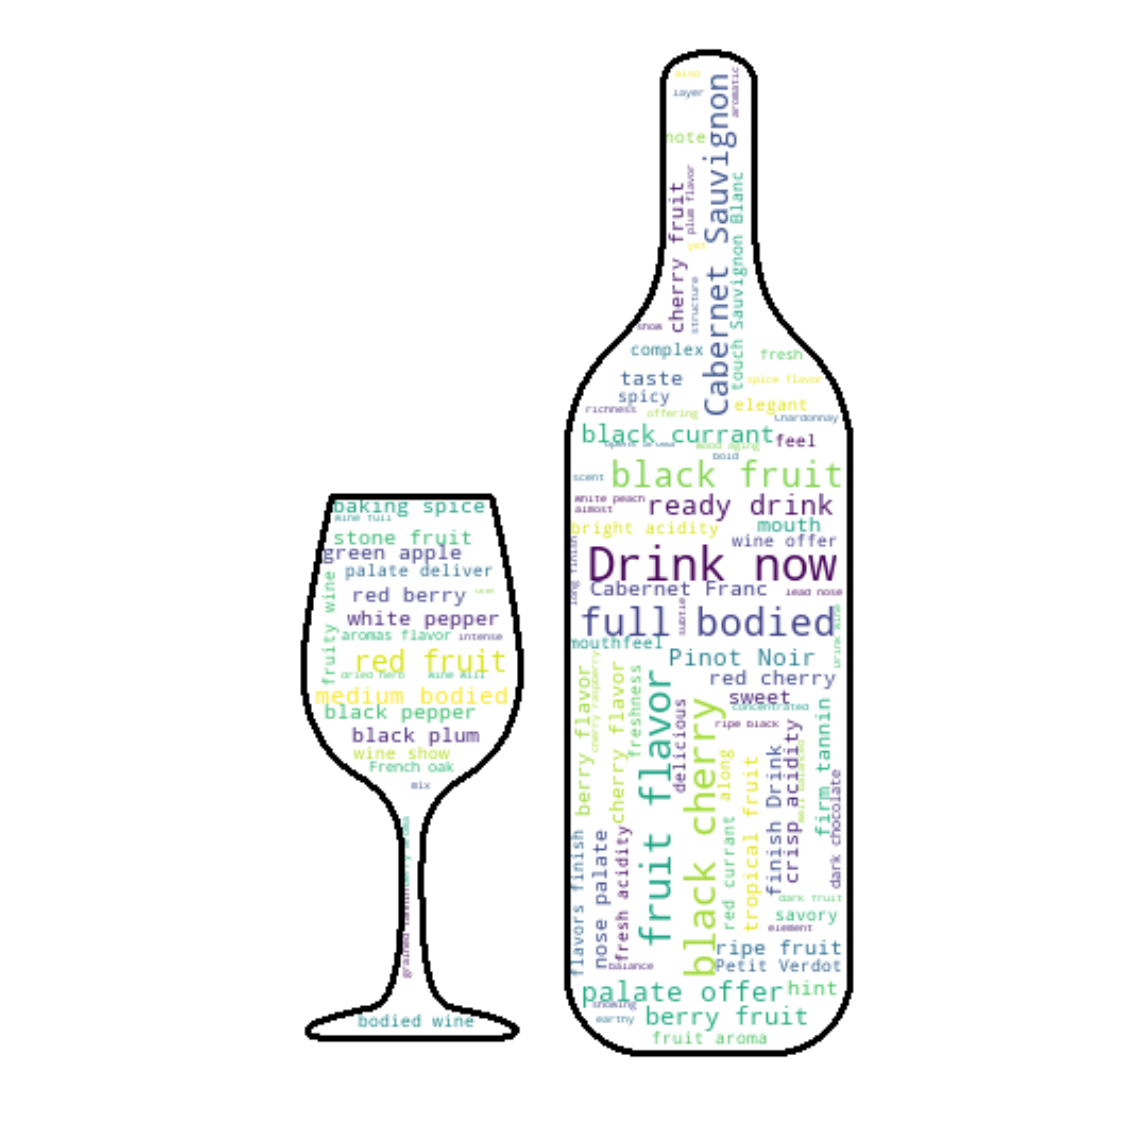

In [8]:
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#:: Creating the word cloud, and plotting it to console.        :::
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## creating the word cloud object. ##
wordcloud = WordCloud(stopwords=newlist,max_words=100,background_color='white', mask=transformed_mask, contour_width=3).generate(text)

## plotting the word cloud object. ##
plt.figure(figsize=[30,20])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()